## NBA Player Statistics — Visualization
### Team TSIAUF — Sanzhar Ilichbekov, Nurbekov Mirlan, Aydraliev Atai.

In this final notebook, we create visual representations of our analysis. According to our project proposal, we focus on clarity and the ability to draw insights quickly.

We will generate:
1.  **Top Player Rankings:** Identifying the leaders in major statistical categories.
2.  **Performance Trends:** Analyzing how specific players perform over time.
3.  **Team Analysis:** Comparing the average efficiency of different teams.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"../data/cleaned_player_stats.csv")
df.head()

,firstName,lastName,personId,gameId,gameDateTimeEst,playerteamCity,playerteamName,opponentteamCity,opponentteamName,win,...,freeThrowsMade,freeThrowsPercentage,reboundsDefensive,reboundsOffensive,reboundsTotal,foulsPersonal,turnovers,plusMinusPoints,efficiency,points_per36
0,Chris,Paul,101108,22500300,2025-11-29 17:00:00,LA,Clippers,Dallas,Mavericks,0,...,0.0,0.0,2.0,0.0,2.0,2.0,0.0,-2.0,6.0,0.000000
1,D'Angelo,Russell,1626156,22500300,2025-11-29 17:00:00,Dallas,Mavericks,LA,Clippers,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,Kris,Dunn,1627739,22500300,2025-11-29 17:00:00,LA,Clippers,Dallas,Mavericks,0,...,0.0,0.0,3.0,0.0,3.0,2.0,1.0,8.0,12.0,6.654344
3,Ivica,Zubac,1627826,22500300,2025-11-29 17:00:00,LA,Clippers,Dallas,Mavericks,0,...,3.0,1.0,9.0,2.0,11.0,5.0,2.0,4.0,34.0,18.225420
4,John,Collins,1628381,22500300,2025-11-29 17:00:00,LA,Clippers,Dallas,Mavericks,0,...,2.0,1.0,4.0,0.0,4.0,2.0,1.0,1.0,28.0,20.982515


In [14]:
df['gameDateTimeEst'] = pd.to_datetime(df['gameDateTimeEst'], utc=True, errors='coerce')
df['gameYear'] = df['gameDateTimeEst'].dt.year
df['gameMonth'] = df['gameDateTimeEst'].dt.month
df = df[df['gameYear'] >= 2016]

### Top Players Analysis

We identify the top 10 players based on their average performance in three key areas: **Points**, **Assists**, and **Rebounds**. We filter the data to include only players who have played a significant number of minutes (average > 20) to ensure we are looking at regular rotation players.

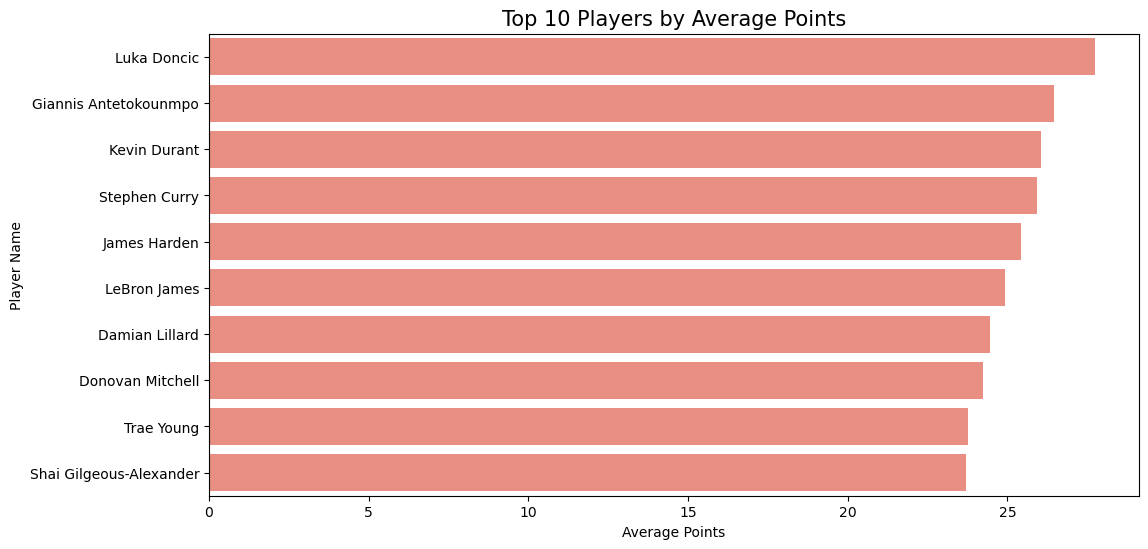

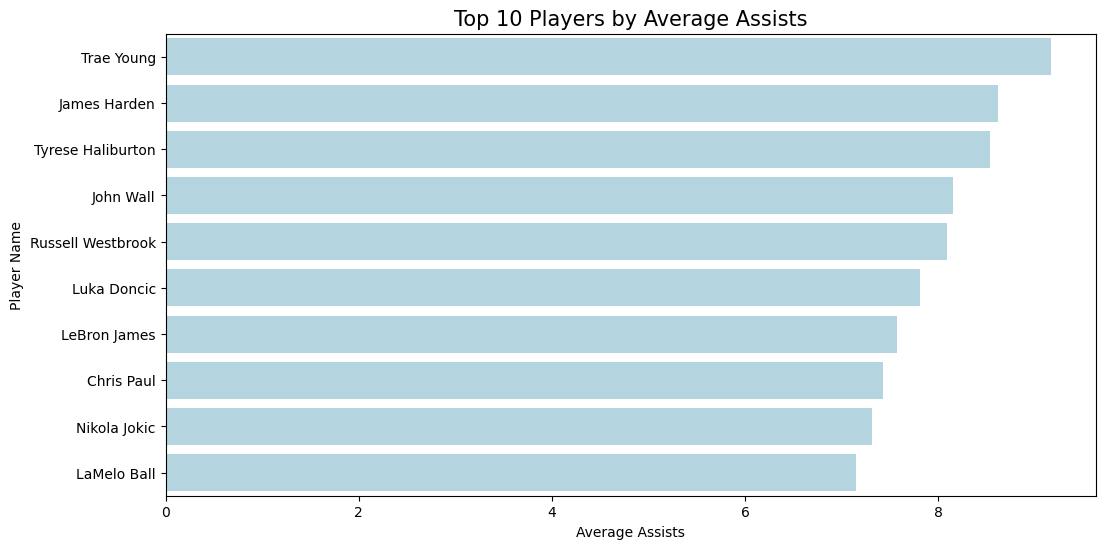

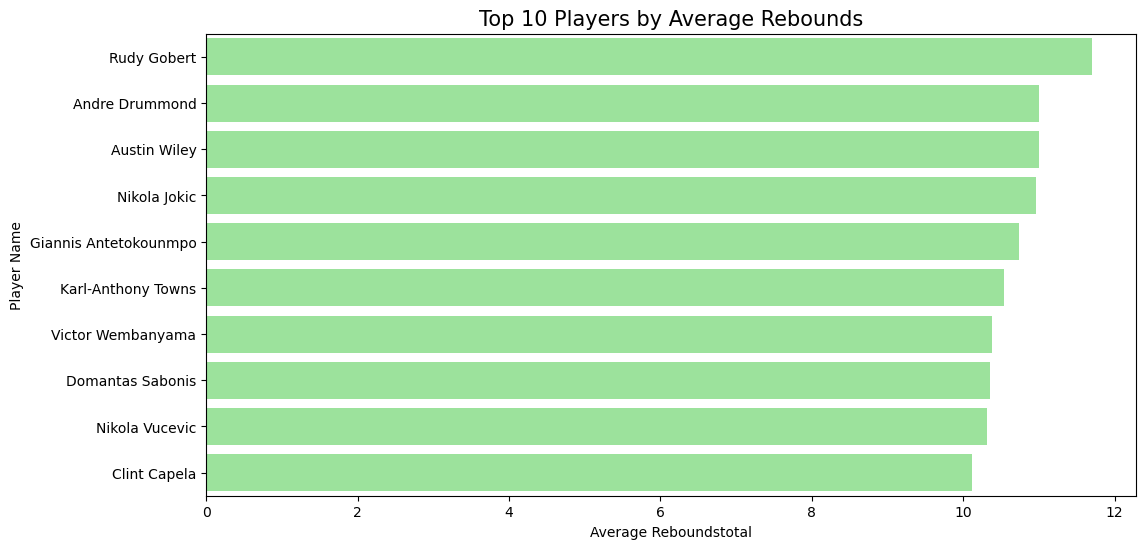

In [9]:
player_stats = df.groupby(['firstName', 'lastName'])[['points', 'assists', 'reboundsTotal', 'numMinutes']].mean()

active_players = player_stats[player_stats['numMinutes'] > 20].reset_index()
active_players['FullName'] = active_players['firstName'] + " " + active_players['lastName']

def plot_top_10(data, column, title, color):
    top_10 = data.sort_values(by=column, ascending=False).head(10)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_10, x=column, y='FullName', color=color)
    plt.title(title, fontsize=15)
    plt.xlabel(f'Average {column.capitalize()}')
    plt.ylabel('Player Name')
    plt.show()

# 1. Top Scorers
plot_top_10(active_players, 'points', 'Top 10 Players by Average Points', 'salmon')

# 2. Top Playmakers (Assists)
plot_top_10(active_players, 'assists', 'Top 10 Players by Average Assists', 'lightblue')

# 3. Top Rebounders
plot_top_10(active_players, 'reboundsTotal', 'Top 10 Players by Average Rebounds', 'lightgreen')

### Performance Over Time

As stated in our proposal, we want to visualize "Performance Over Time." Since plotting every player would be impossible, we select three NBA superstars to compare their scoring trends over the years:
*   **Stephen Curry**

*   **Kevin Durant**

*   **Luka Doncic**

This line chart shows how their average points per game have changed each year.

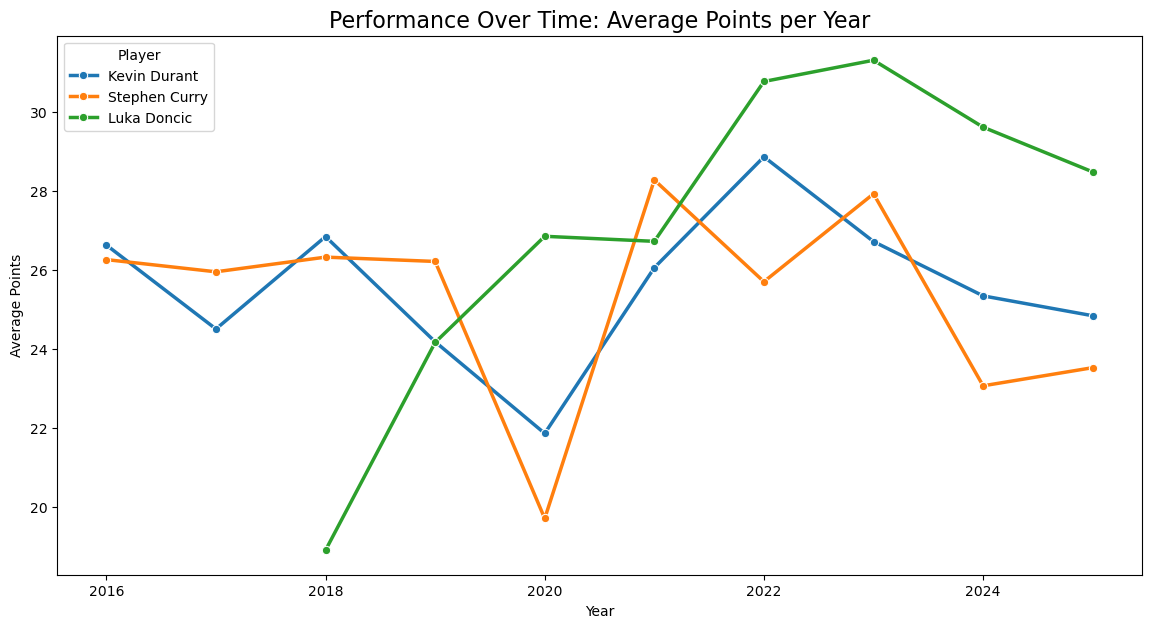

In [25]:
target_players = ['Luka Doncic', 'Stephen Curry', 'Kevin Durant']

df['FullName'] = df['firstName'] + " " + df['lastName']

stars_df = df[df['FullName'].isin(target_players)]

yearly_performance = stars_df.groupby(['gameYear', 'FullName'])['points'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_performance, x='gameYear', y='points', hue='FullName', marker='o', linewidth=2.5)

plt.title('Performance Over Time: Average Points per Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Points')
plt.legend(title='Player')
plt.show()

### Team Efficiency Comparison

We analyze which teams have the highest average player efficiency. This visualization helps us understand which teams generally have the most productive players on the court.

C:\Users\sanca\AppData\Local\Temp\ipykernel_16392\2097395992.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_teams, x='playerteamName', y='efficiency', palette='magma')


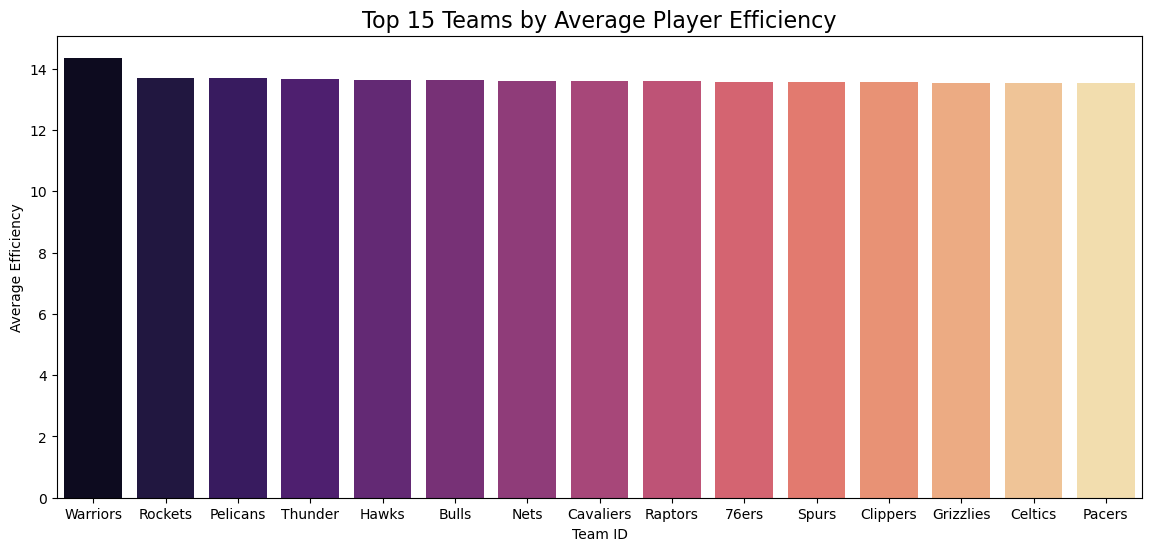

In [28]:
team_stats = df.groupby('playerteamName')['efficiency'].mean().reset_index()

top_teams = team_stats.sort_values(by='efficiency', ascending=False).head(15)

plt.figure(figsize=(14, 6))
sns.barplot(data=top_teams, x='playerteamName', y='efficiency', palette='magma')
plt.title('Top 15 Teams by Average Player Efficiency', fontsize=16)
plt.xlabel('Team ID')
plt.ylabel('Average Efficiency')
plt.show()

### Correlation Heatmap (Final Review)

To conclude our visual analysis, we look at the correlation heatmap again to summarize the relationships between all major variables. This confirms our earlier findings that points, efficiency, and minutes played are strongly linked.

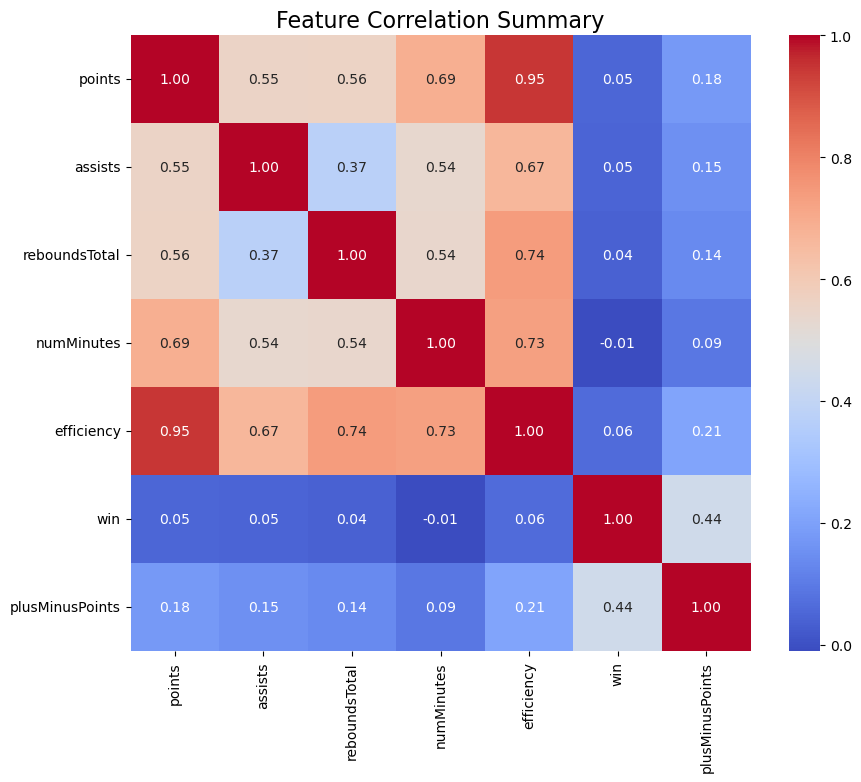

In [31]:
cols = ['points', 'assists', 'reboundsTotal', 'numMinutes', 'efficiency', 'win', 'plusMinusPoints']
corr = df[cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Summary', fontsize=16)
plt.show()